# Missing Values

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

<Axes: >

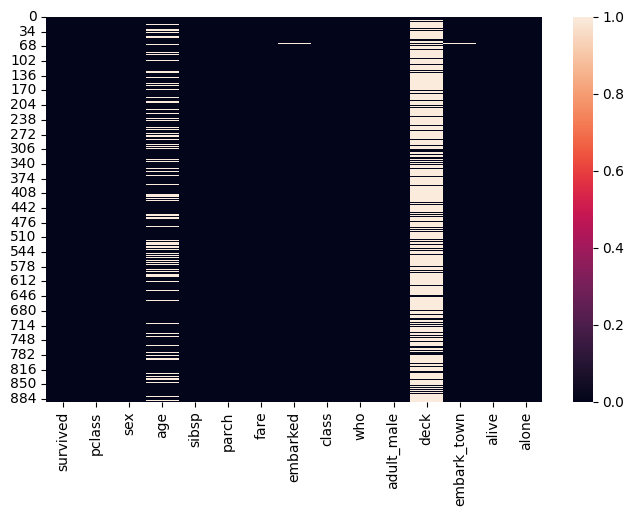

In [4]:
df = sns.load_dataset(('titanic'))

plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

<Axes: >

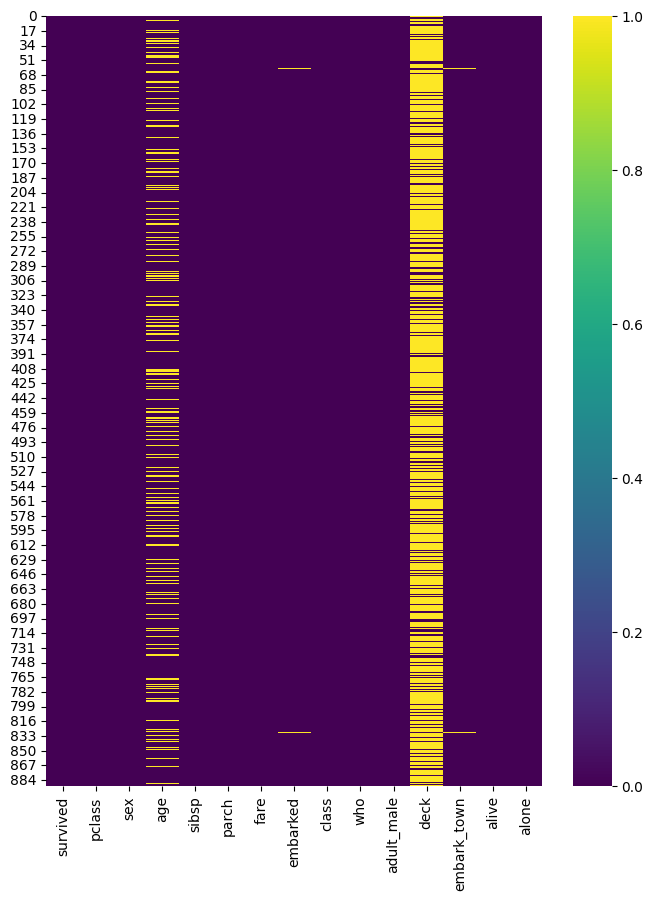

In [5]:
plt.figure(figsize=(8,10))
sns.heatmap(data=df.isnull(),cmap='viridis')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [9]:
# print("Missing values on each column")
# df.isnull().sum().sort_values(ascending=False)

print(f"Missing values in each column:\n{df.isnull().sum().sort_values(ascending=False)}")

print("------------------------------")

print("Percentage on each column")

# For percentage df.isnull().sum() / len(df) * 100  for round of in 2 decimal then *100,2 if round 3 or 4 then *100,3 0r 4
round(df.isnull().sum() / len(df) * 100 ,2).sort_values(ascending=False)



Missing values in each column:
deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64
------------------------------
Percentage on each column


deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

In [ ]:
df['age'].mean()

29.36158249158249

In [ ]:
df['age'].median()

28.0

# Remove miising values Age column

In [ ]:
# Calculate the median
median=df['age'].median()

df['age']=df['age'].fillna(median)

# 2nd methos remove miising values Age column

In [ ]:
df['age']=df['age'].fillna(df['age'].median)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [ ]:
df.drop("deck", axis =1, inplace = True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

embarked       2
embark_town    2
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
class          0
who            0
adult_male     0
alive          0
alone          0
dtype: int64

In [ ]:
df['embark_town'].mode()


0    Southampton
Name: embark_town, dtype: object

In [ ]:
df['embark_town'].mode()[0]

'Southampton'

In [ ]:
df['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### Most of the time repeat Southampton so we can replace missing vales with it

In [ ]:
df['embark_town']=df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])


In [ ]:
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

# create data put missing value and impute missing values

In [ ]:

#  create the data
df=pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})
df

,Age
0,20.0
1,21.0
2,22.0
3,23.0
4,24.0
5,25.0
6,26.0
7,27.0
8,28.0
9,29.0


# Missing Values forwardfill

In [ ]:
df['Age']=df['Age'].ffill()
df

,Age
0,20.0
1,21.0
2,22.0
3,23.0
4,24.0
5,25.0
6,26.0
7,27.0
8,28.0
9,29.0


In [ ]:
# Create the data
# df = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})

# # Print the data with missing value
# print("----------------------------------------")
# print(f"Here is the data with missing value:\n {df}")

# # Replace the missing values with forward fill
# df['Age'] = df['Age'].ffill()
# print("----------------------------------------")
# # Print the data without missing value
# print(f"Here is the data without missing value:\n {df}")

# Missing Values backwardfill

In [ ]:
df =pd.DataFrame({'Fare':[7, 23, 45, 56, 78, 23, 10, np.nan, 50]})
df

,Fare
0,7.0
1,23.0
2,45.0
3,56.0
4,78.0
5,23.0
6,10.0
7,NaN
8,50.0


In [ ]:
df['Fare'] = df['Fare'].bfill()
df

,Fare
0,7.0
1,23.0
2,45.0
3,56.0
4,78.0
5,23.0
6,10.0
7,50.0
8,50.0


# 2nd Method

In [ ]:
# Create the data
data = pd.DataFrame({'Fare': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})
# Print the data with missing value
print("----------------------------------------")
print(f"Here is the data with missing value:\n {df}")

# Replace the missing values with backward fill
data['Fare'] = data['Fare'].bfill()
print("----------------------------------------")
# Print the data without missing value
print(f"Here is the data without missing value:\n {df}")

----------------------------------------
Here is the data with missing value:
    Fare
0   7.0
1  23.0
2  45.0
3  56.0
4  78.0
5  23.0
6  10.0
7  50.0
8  50.0
----------------------------------------
Here is the data without missing value:
    Fare
0   7.0
1  23.0
2  45.0
3  56.0
4  78.0
5  23.0
6  10.0
7  50.0
8  50.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    9 non-null      float64
dtypes: float64(1)
memory usage: 204.0 bytes


In [ ]:
df.isnull().sum().sort_values(ascending=False)

Fare    0
dtype: int64

In [ ]:
df =pd.DataFrame({'Survived':[7, 23, 45, 56, 78, 23, 10, np.nan, 50]})
df

,Survived
0,7.0
1,23.0
2,45.0
3,56.0
4,78.0
5,23.0
6,10.0
7,NaN
8,50.0


# Use SKleran Library impute missing values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### using  simpleimputer impute column  from sklearn

In [ ]:
imputer=SimpleImputer(strategy='median')
data['age']=imputer.fit_transform(data[['age']])

In [ ]:
data.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

 # KNN Imputation is machine learning Algorithm impute neighbouring algorithm, advanced technique replace with AVerage values ,  libraries scikit-learn

 ###  following code to see the steps to fill missing values with KNN

In [ ]:

imputer = KNNImputer(n_neighbors=2)
df['Survived']= imputer.fit_transform (df[['Survived']])
df

,Survived
0,7.0
1,23.0
2,45.0
3,56.0
4,78.0
5,23.0
6,10.0
7,36.5
8,50.0


# 2nd Method

In [ ]:
from sklearn.impute import KNNImputer

# Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, np.nan, 50]})
# Print the data with missing value
print("----------------------------------------")
print(f"Here is the data with missing value:\n {data}")

# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Replace the missing values with KNN imputation
data['Age'] = imputer.fit_transform(data[['Age']])
print("----------------------------------------")
# Print the data without missing value
print(f"Here is the data without missing value:\n {data}")

# Deep Learning Techniques 
# Deal With Miising values

### univariate imputation means just impute 1 column
### Multivariate imputation means base on all variables/column count just 1 age column using iterativeImputer

In [ ]:
dn = sns.load_dataset(('titanic'))

In [ ]:
dn.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
dn['age']=imputer.fit_transform(dn[['age']])



In [ ]:
dn.isnull().sum().sort_values(ascending=False)

deck           688
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### Backfill forwardfill missing values in columns embarked, embark_town

In [ ]:
dn['embark_town']=dn['embark_town'].ffill() # for backward fill write .bfill
dn['embarked']=dn['embarked'].ffill()

In [ ]:
dn.isnull().sum().sort_values(ascending=False)

deck           688
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      0
alive            0
alone            0
dtype: int64

In [ ]:
dn=dn.dropna()

In [ ]:
dn.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# 2nd method 

In [ ]:
# max_iter=20, maximum number of iterative change missing values gain and again,  n_nearest_features=5 means impute with close 5 variable 
dn['age']=imputer.fit_transform(dn[['age']])

In [ ]:
dn['']

# Simply Delete if we have lot of missing values

In [ ]:
df.dropna()

,Class
0,1.0
1,2.0
2,3.0
3,4.0
4,2.5


In [ ]:
#  drop duplicate
dn.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


# Missingno library ko use kar ke bhi hum missing values ko identify kar sakte hain.

### Use the code below to see the steps.

In [ ]:
# # Import libraries
# import pandas as pd
# import numpy as np
# import missingno as msno
# import matplotlib.pyplot as plt
# import seaborn as snss

# # load titanic dataset
# data = sns.load_dataset('titanic')
# # Visualize the data
# msno.matrix(df,labels=True, fontsize=12, width_ratios=(2, 4), color=(0.2, 0.4, 0.6))
# plt.show()